In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
# from six.moves import urlib
import tensorflow.compat.v2.feature_column as fc

# Linear Regression

In [2]:
x = [1,2,2.5,3,4]
y = [1,4,7,9,15]

(0.0, 6.0, 0.0, 20.0)

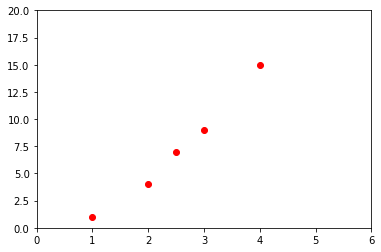

In [3]:
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])

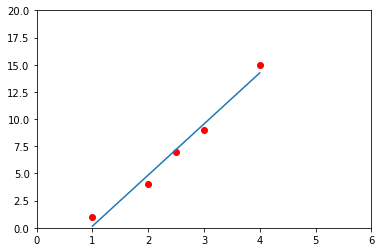

In [4]:
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()

# Linear Regression on Titanic dataset 

FInding out the likelihood of someone surviving the titanic

In [44]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
dftrain.pop('embark_town')
dfeval.pop('embark_town')
dftrain.pop('fare')
dfeval.pop('fare')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


In [45]:
dftrain[:15]

,sex,age,n_siblings_spouses,parch,class,deck,alone
0,male,22.0,1,0,Third,unknown,n
1,female,38.0,1,0,First,C,n
2,female,26.0,0,0,Third,unknown,y
3,female,35.0,1,0,First,C,n
4,male,28.0,0,0,Third,unknown,y
5,male,2.0,3,1,Third,unknown,n
6,female,27.0,0,2,Third,unknown,n
7,female,14.0,1,0,Second,unknown,n
8,female,4.0,1,1,Third,G,n
9,male,20.0,0,0,Third,unknown,y


In [46]:
dftrain.describe()

,age,n_siblings_spouses,parch
count,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585
std,12.511818,1.151090,0.792999
min,0.750000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,35.000000,1.000000,0.000000
max,80.000000,8.000000,5.000000


In [47]:
print(dftrain.loc[0], ' \n ytrain: ',y_train.loc[0])

sex                      male
age                      22.0
n_siblings_spouses          1
parch                       0
class                   Third
deck                  unknown
alone                       n
Name: 0, dtype: object  
 ytrain:  0


<AxesSubplot:>

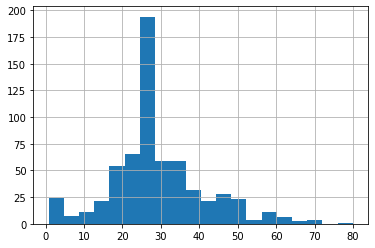

In [48]:
dftrain.age.hist(bins= 20)

<AxesSubplot:>

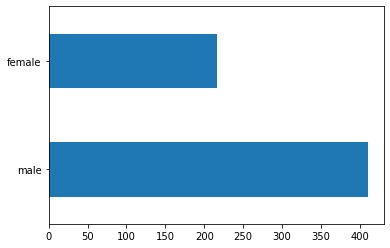

In [49]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

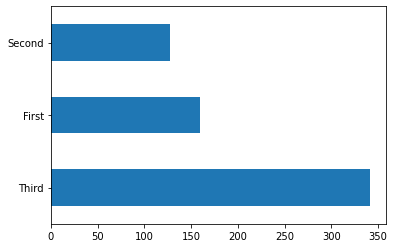

In [50]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, 'survived')

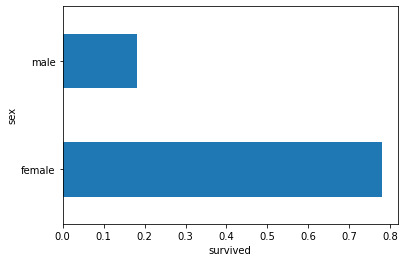

In [51]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('survived')

In [52]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch','class',
                       'deck', 'alone']

NUMERIC_COLUMNS = ['age']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(
        tf.feature_column.categorical_column_with_vocabulary_list(
        feature_name , vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(
    feature_name, dtype=tf.float32))
    
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [53]:
def make_input_fn(data_df, label_df, num_epochs=500, shuffle=True, batch_size=32):
    def input_function(): #inner function, this will be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # create tf.data.Dataset object with data and its labels
        if shuffle:
            ds = ds.shuffle(1000) # randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat process for number of epochs
        return ds # return a batch of the dataset
    return input_function # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train) # call teh input_function that was returned
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [54]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on test data
clear_output() # clears console output
print(result['accuracy'])

0.79545456


In [55]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[25])
print('Survived: ', y_eval.loc[25])
print('Survival Prediction: ', result[25]['probabilities'][1])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/hj/s2jrgqld05v64vqv1sfjvqb00000gn/T/tmpej1eynry/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                    female
age                       2.0
n_siblings_spouses          4
parch                       2
class                   Third
deck                  unknown
alone                       n
Name: 25, dtype: object
Survived:  0
Survival Prediction:  0.5633398
